## 1. 다중선형회귀

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 한글 폰트 사용을 위해서 세팅
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [2]:
# 특성 데이터
x_data1 = [1, 0, 3, 4, 5] #공부_시간
x_data2 = [0, 1, 2, 3, 4] # 출석일수_시간
y_data  = [1, 2, 3, 4, 5] # 점수

In [3]:
# 텐서 생성
x1 = tf.constant( x_data1, tf.float32 )
x2 = tf.constant( x_data2, tf.float32 )
y  = tf.constant( y_data,  tf.float32 )

In [5]:
w1 = tf.Variable(tf.random.uniform([1]))
w2 = tf.Variable(tf.random.uniform([1]))
b  = tf.Variable(tf.random.uniform([1]))

In [6]:
def compute_loss():
    hx = w1*x1 + w2*x2 + b
    cost = tf.reduce_mean( (hx-y)**2 )
    return cost

In [12]:
# 학습 1000번
optimizer = Adam(0.1)
for i in range(1000):
    optimizer.minimize(compute_loss, var_list=[w1, w2, b])

In [15]:
print("{w1: ", w1.numpy(), ", w2: ", w2.numpy(), ", b: ",b.numpy())

{w1:  [-1.9080794e-08] , w2:  [1.] , b:  [1.]


In [14]:
# 5시간 공부 5일 출석
w1.numpy()*5, w2.numpy()*5 + b.numpy()

(array([-9.540397e-08], dtype=float32), array([6.], dtype=float32))

## 2. 다중선형회구 행렬곱: h(x) = xw

In [20]:
df = pd.read_csv('data/test.csv', header=None) # header=None : csv 파일에 컬럼명 없이 데이터만 있는 경우에 header를 사용 X
df.columns = ['퀴즈1','퀴즈2','중간점수','최종점수']
df.head(2)

,퀴즈1,퀴즈2,중간점수,최종점수
0,73,80,75,152
1,93,88,93,185


In [24]:
x_data = df[ ['퀴즈1','퀴즈2','중간점수'] ].values
print(x_data.shape) # 25행 3열

(25, 3)


In [25]:
y_data = df[['최종점수']].values
print(y_data.shape) # 25행 1열

(25, 1)


In [26]:
# 텐서 생성
x = tf.constant( x_data, tf.float32 ) # 퀴즈1,2 및 중간점수
y = tf.constant( y_data, tf.float32 ) # 최종 점수

In [29]:
w = tf.Variable(tf.random.uniform([3,1])) # [특성데이터갯수, 라벨의갯수]
b = tf.Variable(tf.random.uniform([1]))   # [라벨의갯수]

In [30]:
def compute_loss():
    hx = tf.matmul(x,w) + b
    cost = tf.reduce_mean((hx-y)**2)
    return cost

In [31]:
# 학습
optimizer = Adam(0.1)
for i in range(1000):
    optimizer.minimize(compute_loss, var_list=[w,b])

In [32]:
print("{w: ", w1.numpy(), ", b: ",b.numpy())

{w:  [-1.9080794e-08] , b:  [-2.9606752]


In [33]:
# 예측값
def hxFn(x_data):
    xd = np.float32(x_data)
    hx = tf.matmul(xd, w) + b
    return hx.numpy()

In [34]:
# 퀴즈1:90, 퀴즈2:90, 중간점수:84 최종점수를 예측하시오.
hxFn([[90,90,85]])

array([[175.70403]], dtype=float32)

In [43]:
# 예측값
df1 = pd.DataFrame(hxFn(x_data))
df1.columns = ['최종점수_예측값']
df1.head(4)

,최종점수_예측값
0,152.714233
1,184.928513
2,181.655594
3,199.462326


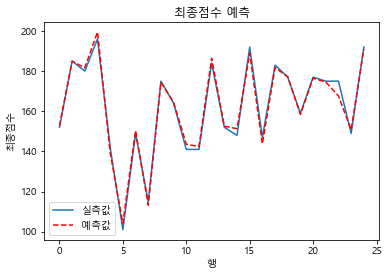

In [58]:
# 예측값 그래프
plt.plot(y_data)              # 최종점수
plt.plot(hxFn(x_data), 'r--') # 예측값
plt.title('최종점수 예측')
plt.ylabel('최종점수')
plt.xlabel('행')
plt.legend(['실측값','예측값']) # 범례
plt.show()

## 3. 다준선형회귀_연습문제

In [65]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [81]:
x_data = boston['data']
print("[x_data] 행:",x_data.shape[0], " 열:",x_data.shape[1])
y_data = boston['target']
print('[y_data] 행:',y_data.shape[0])

[x_data] 행: 506  열: 13
[y_data] 행: 506


In [77]:
# 텐서
x = tf.constant(x_data, tf.float32)
y = tf.constant(y_data, tf.float32)

In [82]:
w = tf.Variable(tf.random.uniform([13,1])) # [열갯수, 라벨갯수]
b = tf.Variable(tf.random.uniform([1]))    # [열갯수]

In [83]:
def compute_loass():
    hx = tf.matmul(x,w) + b
    cost = tf.reduce_mean((hx-y)**2)
    return cost

In [84]:
# 훈련
optimizer = Adam(0.1)
for i in range(1000):
    optimizer.minimize(compute_loss, var_list=[w,b])

In [86]:
print("{w: ", w.numpy(), ", b: ",b.numpy())

{w:  [[ 0.0057046 ]
 [ 0.01241167]
 [ 0.01639183]
 [ 0.38553014]
 [ 0.32709795]
 [ 0.8476976 ]
 [ 0.02149371]
 [ 0.32013226]
 [-0.09454587]
 [ 0.00456341]
 [ 0.49032655]
 [ 0.00646056]
 [ 0.0466085 ]] , b:  [0.96136266]


In [88]:
# 예측 함수
def hxFn(xdata):
    xd = np.float32(xdata)
    hx = tf.matmul(xd, w) + b
    return hx.numpy()

In [90]:
hxFn([x_data[0]])

array([[21.237524]], dtype=float32)

#### 케라스버전

In [91]:
IO = Dense(units=1, input_dim=13)
model = Sequential([IO])
model.compile(loss='mse', optimizer=Adam(0.1))
h = model.fit(x_data, y_data, epochs=500)

Epoch 1/500
16/16 [==============================] - 1s 2ms/step - loss: 2776.0190
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 593.0352
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 237.9274
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 96.1218
Epoch 5/500
16/16 [==============================] - 0s 2ms/step - loss: 70.5525
Epoch 6/500
16/16 [==============================] - 0s 2ms/step - loss: 67.3758
Epoch 7/500
16/16 [==============================] - 0s 2ms/step - loss: 57.2940
Epoch 8/500
16/16 [==============================] - 0s 2ms/step - loss: 61.2136
Epoch 9/500
16/16 [==============================] - 0s 2ms/step - loss: 55.3061
Epoch 10/500
16/16 [==============================] - 0s 2ms/step - loss: 51.5367
Epoch 11/500
16/16 [==============================] - 0s 2ms/step - loss: 58.8327
Epoch 12/500
16/16 [==============================] - 0s 2ms/step - loss: 63.0515
Epoch 13/500
16/16 [=

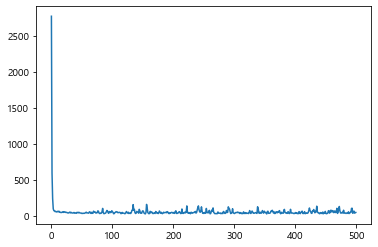

In [92]:
plt.plot(h.history['loss'])
plt.show()

In [95]:
w, b = IO.get_weights()
print("{w: ", w, ", b: ",b,"}")

{w:  [[-0.06197283]
 [ 0.05550729]
 [-0.01072487]
 [ 2.513985  ]
 [-2.9820118 ]
 [ 5.23951   ]
 [-0.00545599]
 [-1.1799309 ]
 [ 0.20989662]
 [-0.01140478]
 [-0.5336275 ]
 [ 0.01280598]
 [-0.44088513]] , b:  [9.482418] }


In [98]:
# 예측값
model.predict(x_data[0].reshape(1,13))

array([[29.676857]], dtype=float32)